✅ Best tuned XGBoost model loaded successfully!


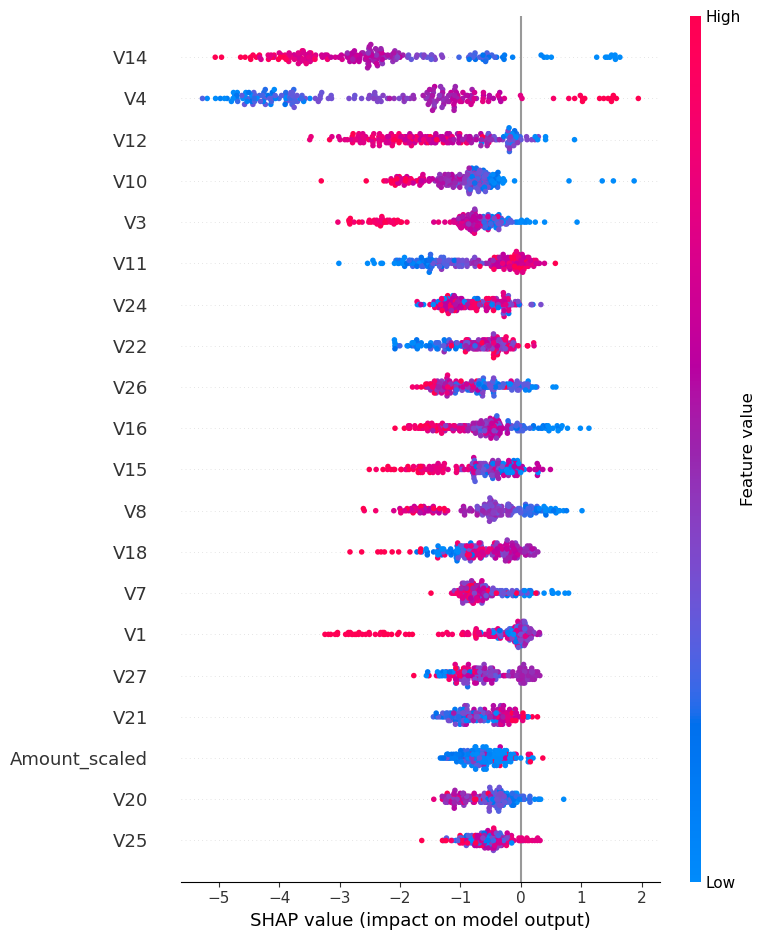

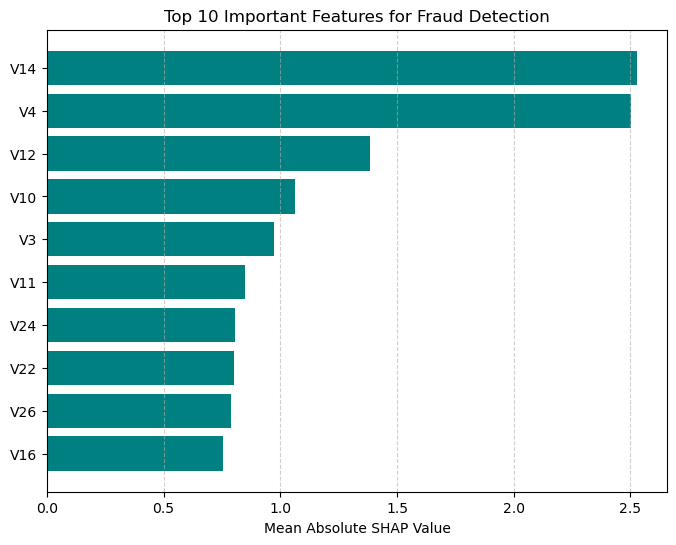

In [19]:
import joblib
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# ------------------------
# STEP 1: Load Data + Model
# ------------------------
X_train, X_test, y_train, y_test = joblib.load(
    "/Users/akashbhat/credit-card-fraud-detection/data/processed_data.pkl"
)

# Load the best tuned XGBoost model (saved as JSON in training script)
best_model = XGBClassifier()
best_model.load_model("/Users/akashbhat/credit-card-fraud-detection/data/fraud_model.json")

print("✅ Best tuned XGBoost model loaded successfully!")

# ------------------------
# STEP 2: SHAP Explainability
# ------------------------
explainer = shap.TreeExplainer(best_model)

# Run SHAP on a subset of test data (200 rows for speed)
shap_values = explainer.shap_values(X_test[:200])  

# SHAP summary plot (global impact of features)
shap.summary_plot(shap_values, X_test[:200])

# ------------------------
# STEP 3: Bar Chart of Top Features
# ------------------------
shap_importance = pd.DataFrame({
    "feature": X_train.columns,
    "importance": np.abs(shap_values).mean(axis=0)
})

# Sort & keep top 10 features
shap_importance = shap_importance.sort_values(by="importance", ascending=False).head(10)

plt.figure(figsize=(8,6))
plt.barh(shap_importance["feature"], shap_importance["importance"], color="teal")
plt.title("Top 10 Important Features for Fraud Detection")
plt.xlabel("Mean Absolute SHAP Value")
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

In [17]:
%%writefile app.py
print("Hello, this is my first .py file from Jupyter!")

Writing app.py
